## __python Basic for hdf5 file__ (@Yeji Choi)
### 2023.04.04

1. 환경설정
1. 필수 라이브러리
1. 기본 문법

In [1]:
import numpy as np
import h5py

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Colab Notebooks/'
fname = '1B.GPM.GMI.TB2016.20210911-S203351-E220625.042830.V05A.HDF5'

In [4]:
h5f=h5py.File(path+fname,'r')

In [5]:
print(h5f, flush=True)

<HDF5 file "1B.GPM.GMI.TB2016.20210911-S203351-E220625.042830.V05A.HDF5" (mode r)>


In [6]:
h5f.keys()

<KeysViewHDF5 ['S1', 'S2']>

In [7]:
h5f['S1'].keys()

<KeysViewHDF5 ['ScanTime', 'scanStatus', 'sampleHeader', 'navigation', 'calibration', 'calCounts', 'sunData', 'Latitude', 'Longitude', 'moonVectorInstFrame', 'incidenceAngle', 'satAzimuthAngle', 'solarZenAngle', 'solarAzimuthAngle', 'sunGlintAngle', 'Tb', 'RFIFlag']>

In [8]:
data=h5f['S1/Tb']
data.shape

(2963, 221, 9)

In [9]:
import matplotlib.pyplot as plt

In [10]:
lon=h5f['S1/Longitude']
lon.shape

(2963, 221)

In [11]:
lat=h5f['S1/Latitude']
lat.shape

(2963, 221)

In [14]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
proj-bin is already the newest version (7.2.1-1~focal0).
proj-data is already the newest version (7.2.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/shapely-2.0.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/shapely/*
Proceed (Y/n)? Y
  Successfully uninst

In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [16]:
def plot_background(ax):
    ax.set_extent([-179.999,179.999,-75,75.],crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    return ax

In [ ]:
crs= ccrs.Robinson(central_longitude=126, globe=None)
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(9,10), #constrained_layout=True,
                          subplot_kw={'projection': crs})
axlist = axarr.flatten()
no=0

path='./'
for ax in axlist:
    #plot_background(ax)
    
    cmp='jet'
    vmin=np.min(data[:,:,no])
    vmax=np.max(data[:,:,no])
    #ma=lon>179 and lon <-179
    print(np.min(lon), np.max(lon), np.min(lat), np.max(lat))
    print(np.min(data[:,:,no]), np.max(data[:,:,no]))
    cf1 = ax.pcolormesh(lon, lat, data[:,:,no], cmap=plt.get_cmap(cmp), 
                                transform=ccrs.PlateCarree(),vmin=vmin, vmax=vmax)
    #ax.set_title('(a) GFS('+date+'_'+var+')', fontsize=10) 
    cbar = fig.colorbar(cf1, ax=axlist[no], orientation="vertical", 
                        pad=0.05,shrink=0.4) #, ticks=range(mindata, maxdata))
    #cbar.set_label(unit, size='x-large')
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    no=no+1
plt.show()

In [27]:
def pcolormesh(lon, lat, data, var, unit, projection, size, cmap, mindata, maxdata):
    fig = plt.figure(figsize=size)
    ax = plt.axes(projection=projection)
    #rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
    cf1 = ax.pcolormesh(lon, lat, data, cmap=cmap, transform=ccrs.PlateCarree(), vmin=mindata, vmax=maxdata)
    ax.coastlines()
    #ax.set_global()
    #ax.set_extent([110,140,20,50])
    ax.set_title(var, size='xx-large')

    cbar = plt.colorbar(cf1, orientation="vertical", 
                        pad=0.05,shrink=0.4) 
    cbar.set_label(unit, size='x-large')

    gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
    gl.xlabels_top = False
    gl.ylabels_left = False
    #gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    plt.show()

/usr/local/lib/python3.9/dist-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/lib/python3.9/dist-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


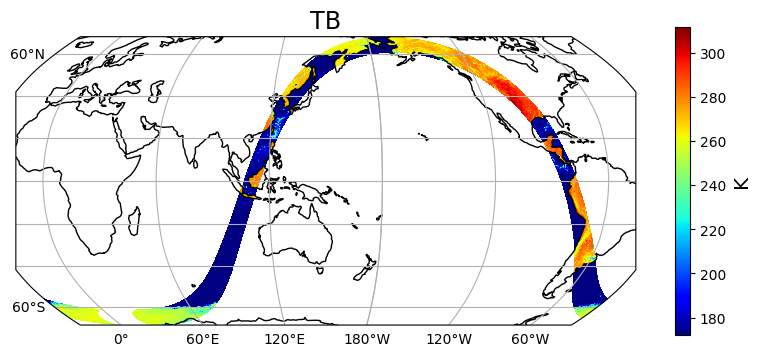

In [34]:
pcolormesh(lon, lat,  data[:,:,0],'TB', 'K', ccrs.Robinson(central_longitude=150), (10,10), 'jet', np.min(data[:,:,no]), np.max(data[:,:,no]))

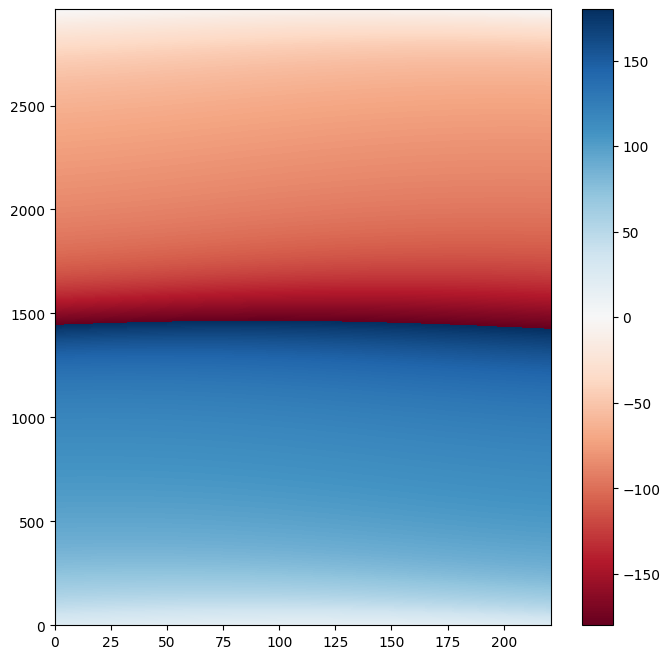

In [20]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(lon, cmap='RdBu')
plt.colorbar()
plt.show()

In [21]:
print(np.max(lon))
fixed_lons = np.array(lon).copy()
for i, start in enumerate(np.argmax(np.abs(np.diff(np.array(lon))) >= np.max(lon), axis=1)):
    fixed_lons[i, start+1:] = -fixed_lons[i, start+1:]+360

179.99855


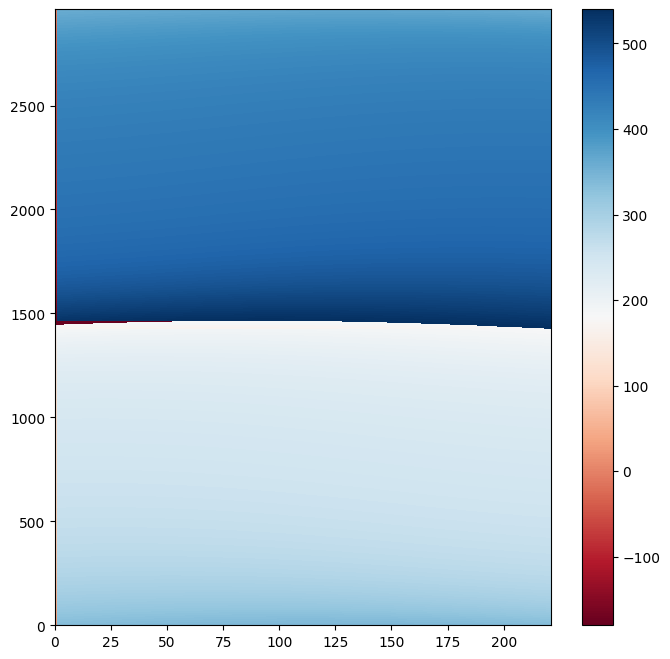

In [22]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(fixed_lons, cmap='RdBu')
plt.colorbar()
plt.show()

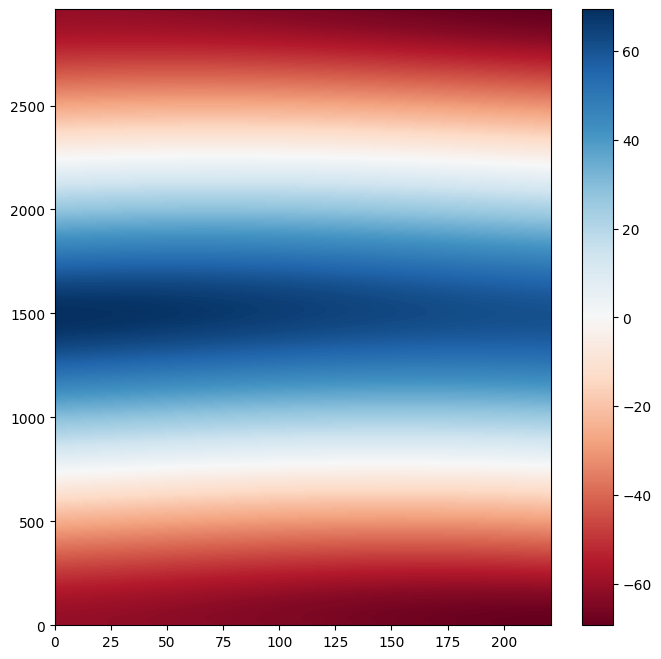

In [23]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(lat, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
Y